In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
%matplotlib widget

[[0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]
 [0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]
 [0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]
 ...
 [0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]
 [0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]
 [0.9999993 0.9999993 0.9999993 ... 1.        1.        1.       ]]


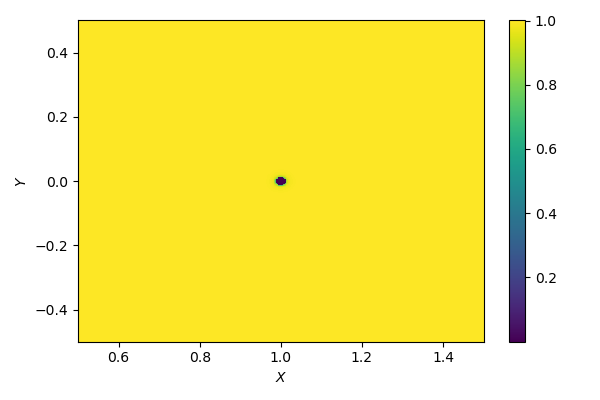

In [2]:
os.chdir("/home/astrosun/jtlaune/athena/work-bondi/")
data0 = athena_read.athdf("bondi_cyl.out1.00000.athdf")
rho0 = data0["dens"][0,:,:]
vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]

data = athena_read.athdf("bondi_cyl.out1.00001.athdf")
rho = data["dens"][0,:,:]
vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]

coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
coordsx = coordsr*np.cos(coordsth)
coordsy = coordsr*np.sin(coordsth)

fig, ax = plt.subplots(figsize=(6,4))
quant = rho
print(quant)
cs1 = ax.pcolormesh(coordsr, coordsth, 
                    quant)#,shading="auto", norm=colors.LogNorm())

fig.colorbar(cs1)
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$Y$")

#fig.colorbar(cs2)
#ax.set_title("integrator=vl2 & xorder=2")
fig.tight_layout()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


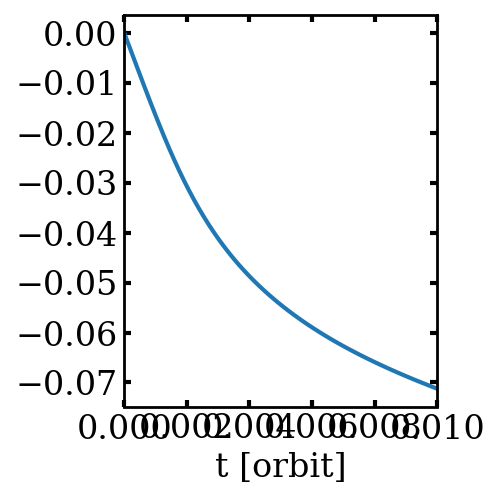

In [3]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work-bondi/")
    hst = np.loadtxt("bondi_cyl.hst")
    t=hst[:,0]/np.pi/2
    fig, ax = plt.subplots(figsize=(5,5))
    Fsgrav_x=hst[:,9]
    Fsgrav_y=hst[:,10]
    accrate=hst[:,11]
    ax.plot(t, accrate)
    ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot()